In [1]:
# Suppress depreciation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

# Add the path to the parent directory to augment search for pytreefile module
sys.path.append('../')
from pytreefile import voxels

In [2]:
### PLEASE NOTE: Cannot vouch for the accuracy of the data, but for the purpose of example it is fine.
voxel_df = voxels.read_voxels('example_data/dense_voxels.txt')
voxel_df

,X,Y,Z,DENSITY,NUM_HITS,NUM_RAYS,VOX_WIDTH
0,37.417702,-62.0,-2.744750,4.93905,9.25322,10.0,0.5
1,37.917702,-62.0,-2.744750,1.48164,2.40876,10.0,0.5
2,38.417702,-62.0,-2.744750,1.18548,1.56627,10.0,0.5
3,38.917702,-62.0,-2.744750,1.36244,2.35294,10.0,0.5
4,39.417702,-62.0,-2.744750,1.85118,3.76812,10.0,0.5
...,...,...,...,...,...,...,...
43500,58.417702,-44.0,18.255199,13.49320,3.00000,3.0,0.5
43501,57.917702,-43.5,18.255199,13.49320,3.00000,3.0,0.5
43502,58.417702,-43.5,18.255199,13.49320,3.00000,3.0,0.5
43503,57.917702,-43.0,18.255199,13.49320,3.00000,3.0,0.5


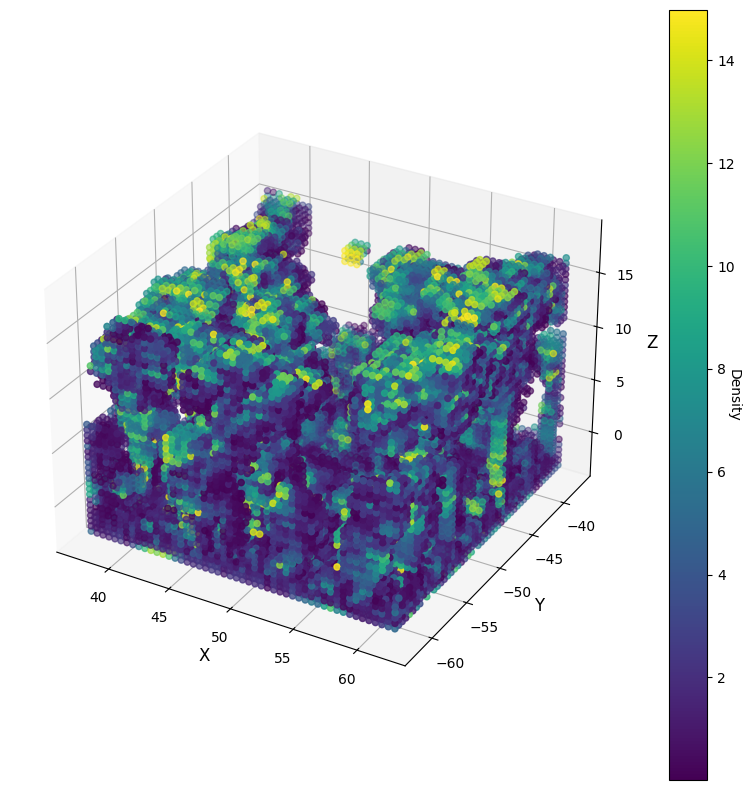

In [3]:
# Plot the voxels
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Single scatter call with coloring by density
sc = ax.scatter(voxel_df.X, voxel_df.Y, voxel_df.Z, c=voxel_df.DENSITY, cmap='viridis')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Add a color bar to interpret the colors
cbar = plt.colorbar(sc)
cbar.set_label('Density', rotation=270)

plt.show()

In [4]:
from pytreefile import points

mask_points = points.read_points('example_data/single_tree_points.txt')
mask_points

,X,Y,Z
0,58.277500,-51.431000,-1.19650
1,58.260750,-51.414001,-1.00150
2,58.256500,-51.409500,-0.95775
3,58.140499,-51.674000,0.25000
4,58.272251,-51.405998,0.42350
...,...,...,...
36936,56.488998,-48.829750,6.98125
36937,57.483501,-54.496498,11.19050
36938,57.228249,-54.756748,11.50175
36939,55.827751,-50.017750,12.41450


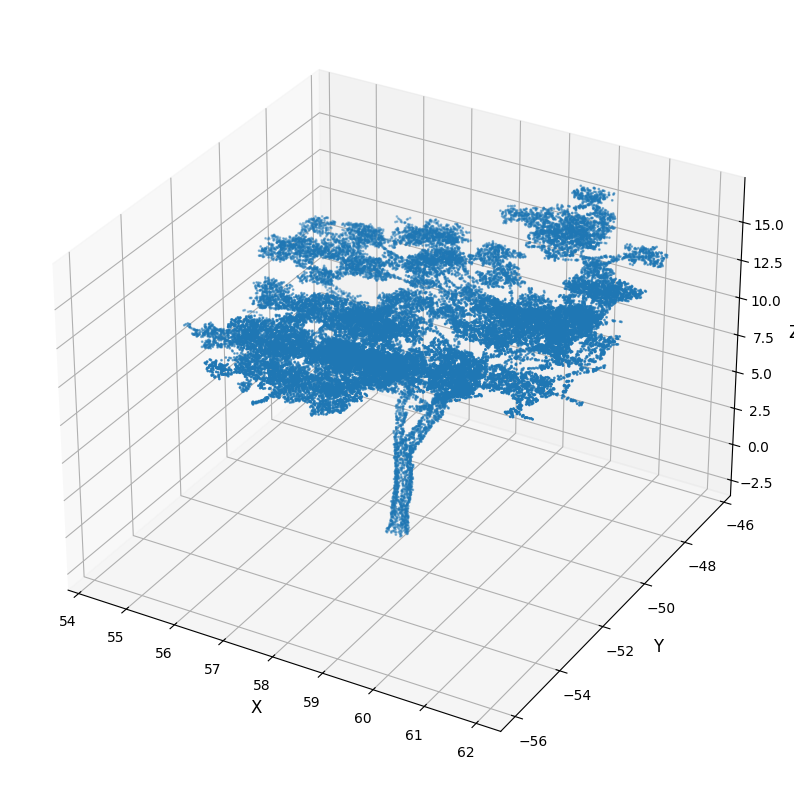

In [5]:
# Plot the points
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(mask_points.X, mask_points.Y, mask_points.Z, s=50)
sc.set_sizes([1])
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

plt.show()

In [6]:
voxel_df_masked = voxels.points_mask_voxels(voxel_df, mask_points)
voxel_df_masked

,X,Y,Z,DENSITY,NUM_HITS,NUM_RAYS,VOX_WIDTH
3517,57.917702,-51.5,-2.244750,1.472090,21.00000,100.0,0.5
3518,58.417702,-51.5,-2.244750,1.039410,18.00000,113.0,0.5
5999,57.917702,-51.5,-1.744750,2.272130,6.00000,38.0,0.5
6000,58.417702,-51.5,-1.744750,1.812970,7.00000,43.0,0.5
8375,57.917702,-51.5,-1.244750,0.621974,1.00000,37.0,0.5
...,...,...,...,...,...,...,...
42567,60.417702,-47.5,16.255199,5.276780,9.00000,14.0,0.5
42590,59.917702,-47.0,16.255199,2.398320,26.00000,93.0,0.5
42591,60.417702,-47.0,16.255199,4.231000,12.00000,22.0,0.5
43023,59.917702,-47.0,16.755199,5.853380,5.90909,10.0,0.5


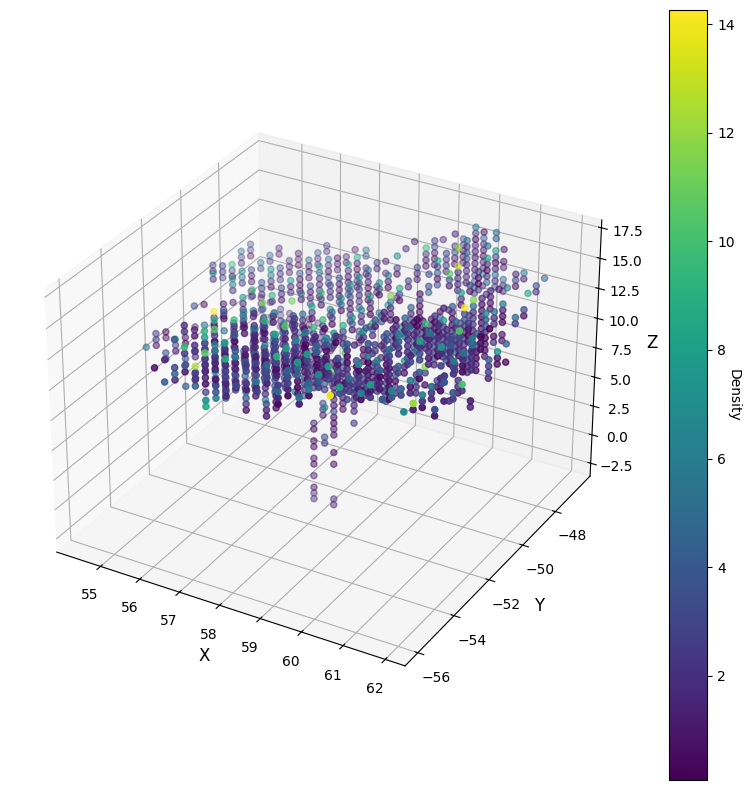

In [7]:
# Plot the voxels
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Single scatter call with coloring by density
sc = ax.scatter(voxel_df_masked.X, voxel_df_masked.Y, voxel_df_masked.Z, c=voxel_df_masked.DENSITY, cmap='viridis')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Add a color bar to interpret the colors
cbar = plt.colorbar(sc)
cbar.set_label('Density', rotation=270)

plt.show()

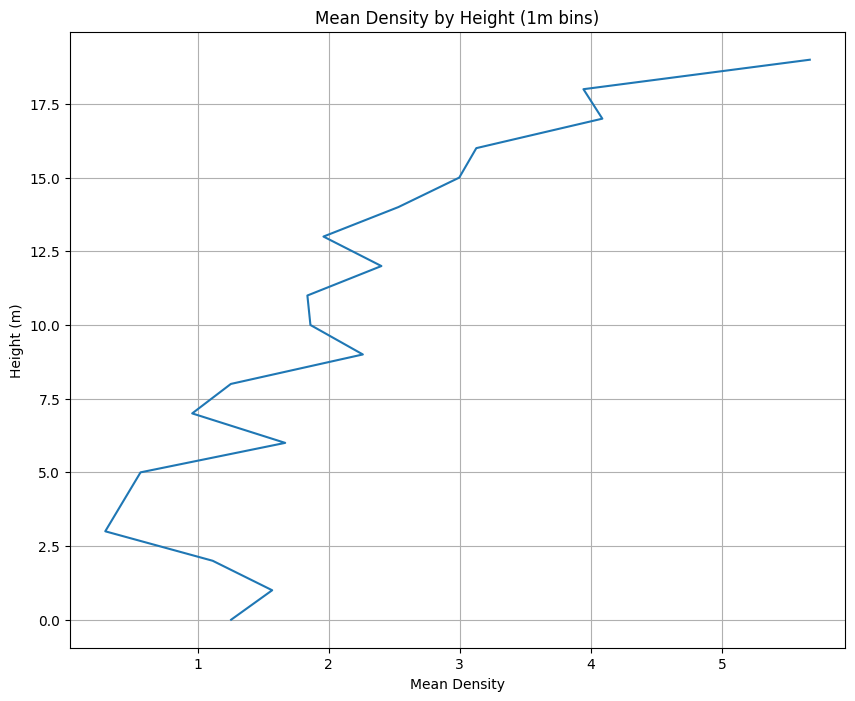

In [8]:
# Normalize 'z' values to start from 0
voxel_df_masked.loc[:, 'Z_normalized'] = voxel_df_masked['Z'] - voxel_df_masked['Z'].min()

# Round the normalized 'z' values to the nearest meter
voxel_df_masked.loc[:, 'Z_rounded'] = np.round(voxel_df_masked['Z_normalized'])

# Group by the rounded normalized height ('z_rounded') and calculate the mean volume for each bin
mean_density_by_height = voxel_df_masked.groupby('Z_rounded')['DENSITY'].mean()

# Plot the mean volume by height with bins of 1 meter
plt.figure(figsize=(10, 8))
plt.plot(mean_density_by_height.values, mean_density_by_height.index, linestyle='-')

# Add labels and title
plt.ylabel('Height (m)')
plt.xlabel('Mean Density')
plt.title('Mean Density by Height (1m bins)')

# Show the plot
plt.grid(True)
plt.show()